<h1 align="center"> What Features Affect Laptop Prices?</h1>
<br><br><br>
<h3 align="center">Word Count: 1984 </h3>

OneDrive link for the Jupyter Notebook file <https://liveuclac-my.sharepoint.com/:f:/g/personal/uceieos_ucl_ac_uk/Eoy2JO4ESs5HvO0Tt53UIP0BSy-TfcjAN0_mBBG83FxBYQ?e=G336k4>

# Table of contents
* [Introduction](#Introduction)
* [Data Set Preparation](#DataSetPreparation)
  * [Data Cleaning](#DataCleaning)
  * [Dataframe Overview](#DataframeOverview)
  * [Data Wrangling and Feature Engineering](#Datawrangling)
* [Explanatory Data Analysis](#ExplanatoryDataAnalysis)
  * [Analysis of Categorical Features](#AnalysisofCategoricalFeatures)
  * [Analysis of Numerical Features](#AnalysisofNumericalFeatures)
* [Prediction Models](#PredictionModels)
  * [Label Encoding and Standardization](#LabelEncodingandStandardization)
  * [Machine Learning Models](#MachineLearningModels)
* [Fine-Tuning](#FineTuning)
  * [Best Performing Models](#BestPerformingModels)
  * [Random Forest Regressor](#RandomForestRegressor)
  * [XGBoost Regressor](#XGBoostRegressor)
  * [Stacking Models](#StackingModels)
* [Summary of the Results](#SummaryoftheResults)
* [Conclusion](#Conclusion)
* [Reference List](#ReferenceList)

# Introduction <a class="anchor" id="Introduction"></a>

Laptops are widely used around the globe if it is being for work or gaming purposes. It is an undeniable fact that various companies release new laptops every year. The pricing of these laptops is made based on their characteristics such as RAM, CPU, GPU, etc., thus this paper tried to identify the most important characteristics that affect laptop prices, as well as, provided price-predictive models using different machine learning models to simplify pricing process for the UK retail laptop stores.

In [4]:
#Import important libraries
import io
from IPython.nbformat import current

with io.open("MSIN0097 Predictive Analytics Individual Assignment.ipynb", 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
    

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [142]:
# Show the word count
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print( word_count)

1984


# Data Set Preparation <a class="anchor" id="DataSetPreparation"></a>

The Dataset used for this analysis is obtained from the Kaggle Database (Varli, 2021). The acquired dataset consists of 1303 observations and 12 variables. 

## Data Cleaning <a class="anchor" id="DataCleaning"></a>

In [3]:
# Import data set using pandas:
df = pd.read_csv("laptop_price.csv",encoding = "ISO-8859-1", index_col = 0)
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


As the first step of the data cleaning process, the dataset is checked for null values and as is shown below there are no variables with null values.

In [4]:
# Check if there is any null values
df.isnull().any()

Company             False
Product             False
TypeName            False
Inches              False
ScreenResolution    False
CPU                 False
RAM                 False
Memory              False
GPU                 False
OpSys               False
Weight              False
Price_euros         False
dtype: bool

The next step is to see if the there are any duplicated rows in the dataset.

In [5]:
# Identify the number of duplicated rows
df[df.duplicated()].shape

(28, 12)

As the last step of the data cleaning process identified 28 duplicated observations were dropped from the dataset.

In [6]:
# Drop the 28 duplicated rows
df = df.drop_duplicates()
df[df.duplicated()].shape

(0, 12)

## Dataframe Overview <a class="anchor" id="DataframeOverview"></a>

The data type of all 12 variables is shown to understand which variables should go through the data wrangling and feature engineering process.

In [7]:
# Datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1 to 1292
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   CPU               1275 non-null   object 
 6   RAM               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   GPU               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.5+ KB


## Data Wrangling and Feature Engineering <a class="anchor" id="Datawrangling"></a>

#### Price 

Since one of the goals of this paper is to build a predictive model for the UK retail laptop stores, the currency in the price column is changed from euros to UK pounds using the exchange rate.

In [8]:
# Create a new column (using the exchange rate, 1 euro = 0.83 pounds)
df['Price_pounds'] = df.apply(lambda row: row.Price_euros * 0.83, axis=1)

In [9]:
# Round the price of laptops
df['Price_pounds'] = df['Price_pounds'].round(decimals = 2)

In [10]:
# Drop price in euros column
df = df.drop('Price_euros', axis = 1)
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,OpSys,Weight,Price_pounds
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1111.94
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,746.12
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,477.25
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2106.08
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1496.99


#### Screen Resolution

The "ScreenResolution" variable contains extra information, thus resolution values are extracted to add a new column into the data frame.

In [11]:
# Check the unique values in ScreenResolution column
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [12]:
# Create new column by extracting resolution values
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df.Resolution.value_counts()

1920x1080    833
1366x768     290
3840x2160     43
3200x1800     25
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: Resolution, dtype: int64

#### CPU

As the "CPU" Variable contains information about brand and frequency, two additional variables are created and added to the data frame.

In [13]:
# Check the unique values in CPU column
df.CPU.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [14]:
# Create new column by extracting clock rate from CPU
df['CPU_GHz'] = df['CPU'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')

In [15]:
# Remove text from column
df['CPU_GHz'] = df['CPU_GHz'].str.replace('GHz','')
df['CPU_GHz']

laptop_ID
1       2.3
2       1.8
3       2.5
4       2.7
5       3.1
       ... 
1288    2.5
1289    2.5
1290    1.6
1291    2.5
1292    1.6
Name: CPU_GHz, Length: 1275, dtype: object

In [16]:
# Change the data type
df['CPU_GHz'] = df['CPU_GHz'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1 to 1292
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   CPU               1275 non-null   object 
 6   RAM               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   GPU               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_pounds      1275 non-null   float64
 12  Resolution        1275 non-null   object 
 13  CPU_GHz           1275 non-null   float64
dtypes: float64(3), object(11)
memory usage: 149.4+ KB


In [17]:
# Create new column by extracting CPU brand names
df['CPU1'] = df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

def text_extract(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
df['CPU_Model'] = df['CPU1'].apply(text_extract)
df.CPU_Model.unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

#### Weight and RAM

As the next step, the text from the "Weight" and "RAM" is removed and the data type of these columns is changed to float and integer values respectively.

In [18]:
# Check the unique values in Weight column
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [19]:
# Check the unique values in Ram column
df.RAM.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [20]:
# Remove text from the columns
df['Weight'] = df['Weight'].str.replace('kg','')
df['RAM'] = df['RAM'].str.replace('GB','')

In [21]:
# Change the data type of Weight and Ram
df['Weight'] = df['Weight'].astype('float64')
df['RAM'] = df['RAM'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1 to 1292
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   CPU               1275 non-null   object 
 6   RAM               1275 non-null   int64  
 7   Memory            1275 non-null   object 
 8   GPU               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   float64
 11  Price_pounds      1275 non-null   float64
 12  Resolution        1275 non-null   object 
 13  CPU_GHz           1275 non-null   float64
 14  CPU1              1275 non-null   object 
 15  CPU_Model         1275 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory

#### Memory

The "Memory" variable also contains different types of information, therefore numerical values are extracted from this column and the data type is changed to integer values. 

In [22]:
# Check the unique values in Memory column
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [23]:
# Create new column by extracting memory size 
df['Memory_Size'] = df.Memory.str.extract(r'(\d+GB|\d+TB)')
df['Memory_Size'] = df.Memory_Size.str.extract(r'(\d+)')

# Change the data type
df['Memory_Size'] = df['Memory_Size'].astype('int64')
df['Memory_Size'] = list((map((lambda x: x*1000 if x < 8 else x),df['Memory_Size'])))
df.Memory_Size.unique()

array([ 128,  256,  512,  500, 1000,   32,   64, 2000,    0,   16,  180,
        240,    8,  508], dtype=int64)

#### GPU

Finally, information about the GPU brands is extracted and the new variable "GPU_Brand" is added to the data frame.

In [24]:
# Check the unique values in CPU column
df.GPU.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [25]:
# Create new column by extracting GPU brand names
df['GPU_Brand'] = df.GPU.str.extract(r'(Intel|AMD|Nvidia|ARM)')
df.GPU_Brand.unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

#### Final Dataframe

In the last stage of this section of the paper, columns that are not used in the analysis are dropped and a new data frame is shown below.

In [26]:
# Drop columns
df = df.drop(['ScreenResolution', 'CPU1', 'GPU'], axis = 1)
df.head(5)

,Company,Product,TypeName,Inches,CPU,RAM,Memory,OpSys,Weight,Price_pounds,Resolution,CPU_GHz,CPU_Model,Memory_Size,GPU_Brand
laptop_ID,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1111.94,2560x1600,2.3,Intel Core i5,128,Intel
2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,746.12,1440x900,1.8,Intel Core i5,128,Intel
3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,477.25,1920x1080,2.5,Intel Core i5,256,Intel
4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2106.08,2880x1800,2.7,Intel Core i7,512,AMD
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1496.99,2560x1600,3.1,Intel Core i5,256,Intel


In [27]:
# Datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1 to 1292
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1275 non-null   object 
 1   Product       1275 non-null   object 
 2   TypeName      1275 non-null   object 
 3   Inches        1275 non-null   float64
 4   CPU           1275 non-null   object 
 5   RAM           1275 non-null   int64  
 6   Memory        1275 non-null   object 
 7   OpSys         1275 non-null   object 
 8   Weight        1275 non-null   float64
 9   Price_pounds  1275 non-null   float64
 10  Resolution    1275 non-null   object 
 11  CPU_GHz       1275 non-null   float64
 12  CPU_Model     1275 non-null   object 
 13  Memory_Size   1275 non-null   int64  
 14  GPU_Brand     1275 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 159.4+ KB


# Explanatory Data Analysis <a class="anchor" id="ExplanatoryDataAnalysis"></a>

## Analysis of Categorical Features <a class="anchor" id="AnalysisofCategoricalFeatures"></a>

#### Company

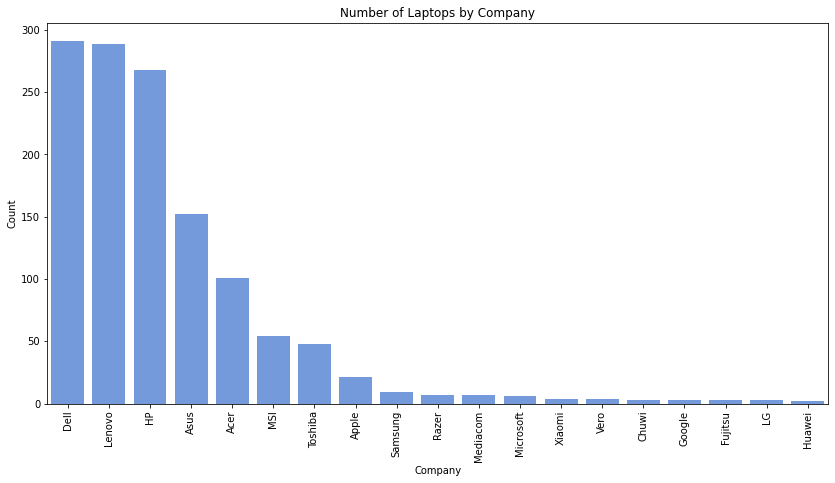

In [28]:
# Number of laptops by company
plt.subplots(figsize=(14,7))
plt.title('Number of Laptops by Company')
sns.countplot(x = 'Company', 
              color = 'cornflowerblue',
              data = df, 
              order = df['Company'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Count')
plt.show()

From the bar chart above, it can be concluded that Dell, Lenovo, and HP laptops are the most frequent in the dataset and there are above 250 observations of these laptop brands. The number of laptops manufactured by the rest of the companies is below 150.

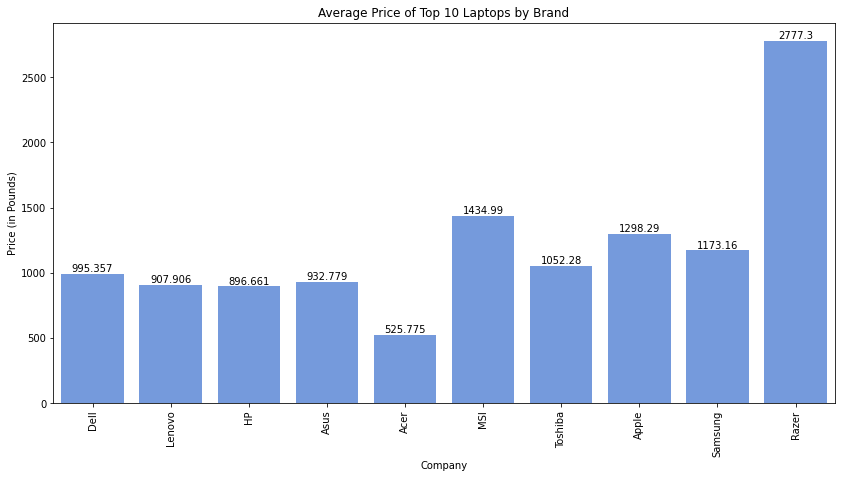

In [29]:
# Bar chart to identify average price for top 10 laptop brands
Company_Top_10 = df['Company'].value_counts().index[:10].tolist()
plt.figure(figsize=(14,7))
avg = sns.barplot(x ='Company', 
                  y = 'Price_pounds', 
                  color = 'cornflowerblue',
                  data = df[df['Company'].isin(Company_Top_10)],
                  ci = False,
                  order = Company_Top_10
                 )
avg.bar_label(avg.containers[0])
plt.xticks(rotation = 'vertical');
plt.ylabel('Price (in Pounds)')
plt.title('Average Price of Top 10 Laptops by Brand')
plt.show()

The above graph demonstrates the average price for the top 10 most frequent laptop brands. The average price for Razer laptops is the highest by far in comparison with the other companies. This can be supported by the fact that Razer usually manufactures gaming laptops and the high price of those laptops pulls the average price up. This agrees with the article (Kinton, 2022), where he stated that compared to other gaming laptops, Razer gaming laptops are often more expensive. The average price for the MSI, Apple, Samsung, and Toshiba laptops is above £1000 while for the rest brands it is the contrary.

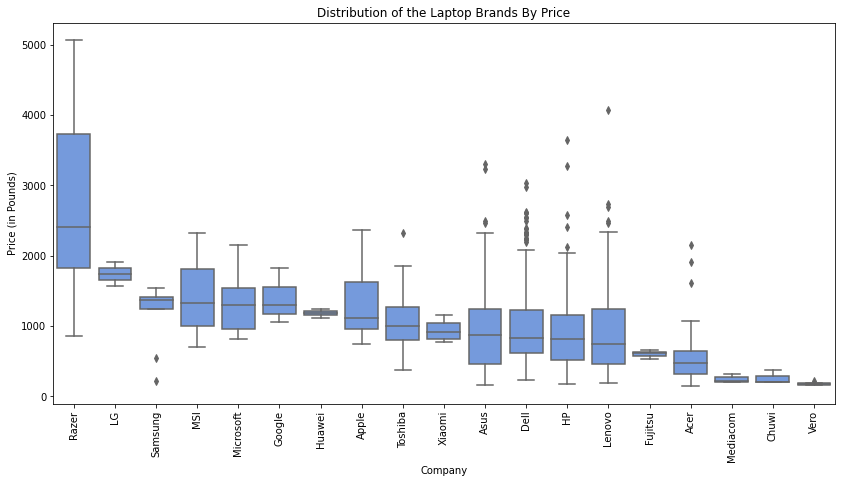

In [30]:
# Box chart to identify which company sells the most expensive laptops
graph = df.groupby(['Company'])['Price_pounds'].median().reset_index().sort_values('Price_pounds', ascending = False)

plt.figure(figsize = (14, 7))
plt.title('Distribution of the Laptop Brands By Price')
sns.boxplot(
    x = 'Company',
    y = 'Price_pounds',
    color = 'cornflowerblue',
    data = df,
    order = graph['Company']
)
plt.xticks(rotation = 'vertical')
plt.ylabel('Price (in Pounds)')
plt.show()

The box plot demonstrates how price is distributed across different brands. Razer and LG laptops have the highest median compared to other laptops. Moreover, there are some outliers in the prices of Samsung, Toshiba, Asus, Dell, HP, Lenovo, and Acer laptops. Also, Razer laptops have the highest price among the listed firms because of the facts stated previously.

#### Type

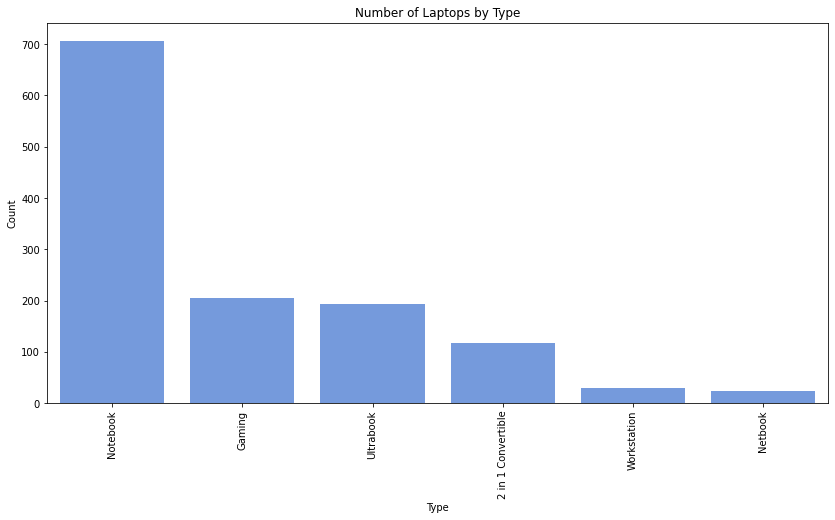

In [31]:
# Number of laptops by typenam
plt.subplots(figsize = (14,7))
plt.title('Number of Laptops by Type')
sns.countplot(x = 'TypeName', 
              data = df, 
              color = 'cornflowerblue',
              order = df['TypeName'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

The bar chart shows that notebook type of laptops have the highest count compared to other types, while the rest type of laptops is around 200 and below.

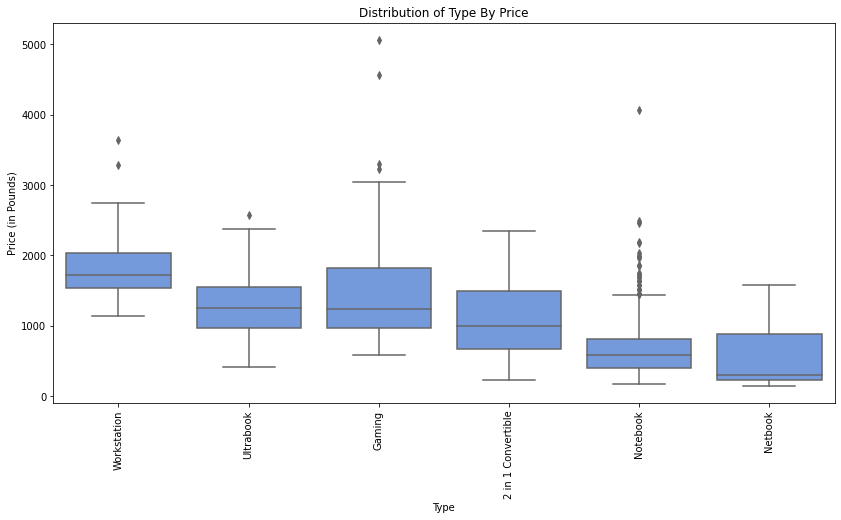

In [32]:
# Box chart to identify which laptop type is the most expensive
graph = df.groupby(['TypeName'])['Price_pounds'].median().reset_index().sort_values('Price_pounds', ascending = False)

plt.figure(figsize = (14, 7))
plt.title('Distribution of Type By Price')
sns.boxplot(
    x = 'TypeName',
    y = 'Price_pounds',
    color = 'cornflowerblue',
    data = df,
    order = graph['TypeName']
)
plt.xticks(rotation = 'vertical')
plt.ylabel('Price (in Pounds)')
plt.xlabel('Type')
plt.show()

The graph above displays distribution of prices across various types of laptops. Workstation laptops have the highest median because they are capable of high-performance tasks such as rendering and data analysis. It's a high-capacity laptop with plenty of memory and processing power, therefore, they tend to be expensive (medCPU, 2021). However, the highest price among these categories is in gaming one.

#### Operating System

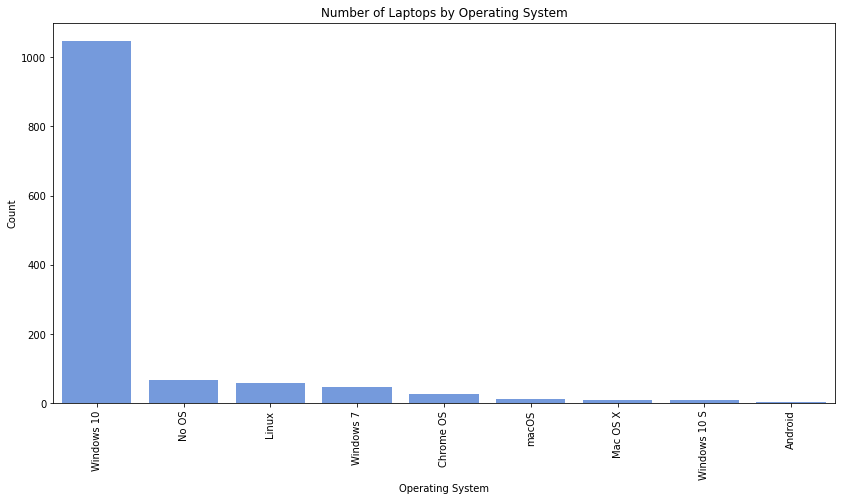

In [33]:
# Number of laptops by operating system
plt.subplots(figsize = (14,7))
plt.title('Number of Laptops by Operating System')
sns.countplot(x = 'OpSys', 
              data = df, 
              color = 'cornflowerblue',
              order = df['OpSys'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Count')
plt.xlabel('Operating System')
plt.show()

The bar chart indicates that there are more than 1000 laptops with the Windows 10 OS which is intuitive because most of the recent laptops have the latest OS preinstalled.

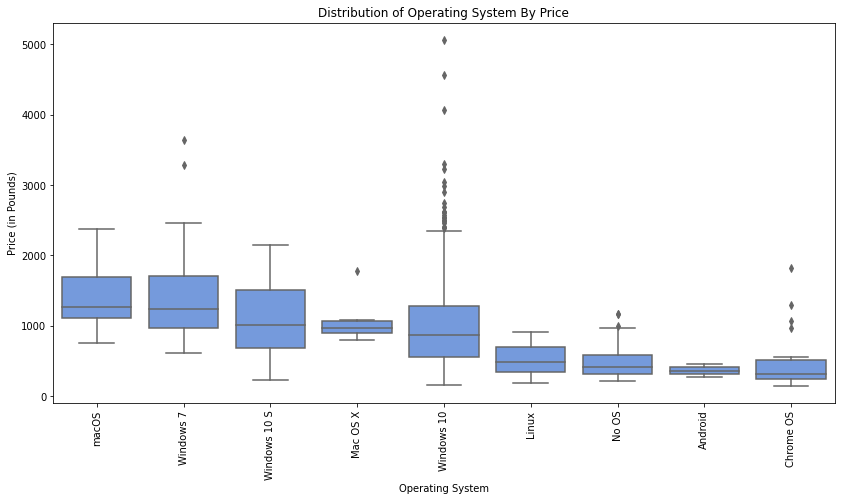

In [34]:
# Box chart to identify laptops with which operating system are the most expensive
graph = df.groupby(['OpSys'])['Price_pounds'].median().reset_index().sort_values('Price_pounds', ascending = False)

plt.figure(figsize = (14, 7))
plt.title('Distribution of Operating System By Price')
sns.boxplot(
    x = 'OpSys',
    y = 'Price_pounds',
    data = df,
    color = 'cornflowerblue',
    order = graph['OpSys']
)
plt.xticks(rotation = 'vertical')
plt.ylabel('Price (in Pounds)')
plt.xlabel('Operating System')
plt.show()

The box plot suggests that macOS and Windows 7 laptops have the highest median price among the operating systems, while laptops with Windows 7 and 10 have the highest price compared to the rest.

#### CPU

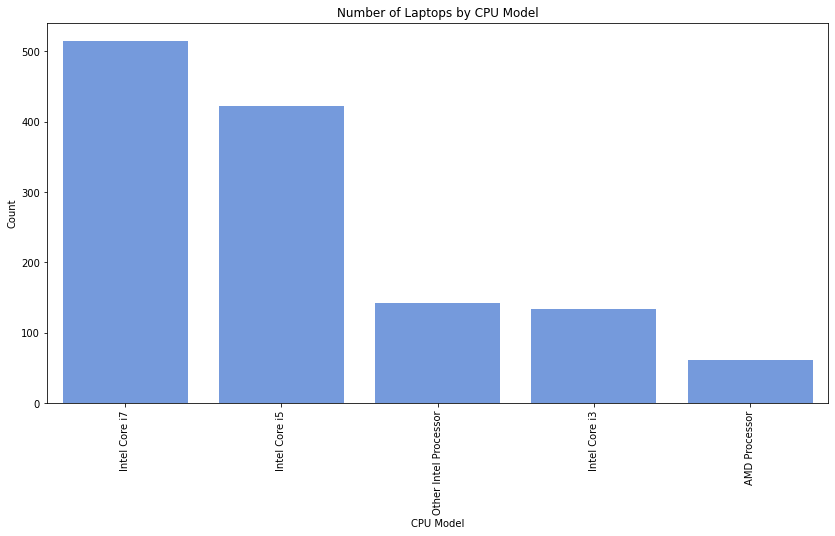

In [35]:
# Number of laptops by CPU model
plt.subplots(figsize = (14,7))
plt.title('Number of Laptops by CPU Model')
sns.countplot(x = 'CPU_Model', 
              data = df, 
              color = 'cornflowerblue',
              order = df['CPU_Model'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Count')
plt.xlabel('CPU Model')
plt.show()

The graph above shows that most of the laptop manufacturers use Intel Core i7 and i5 CPU models, while the AMD Processor is the least frequent in the dataset.

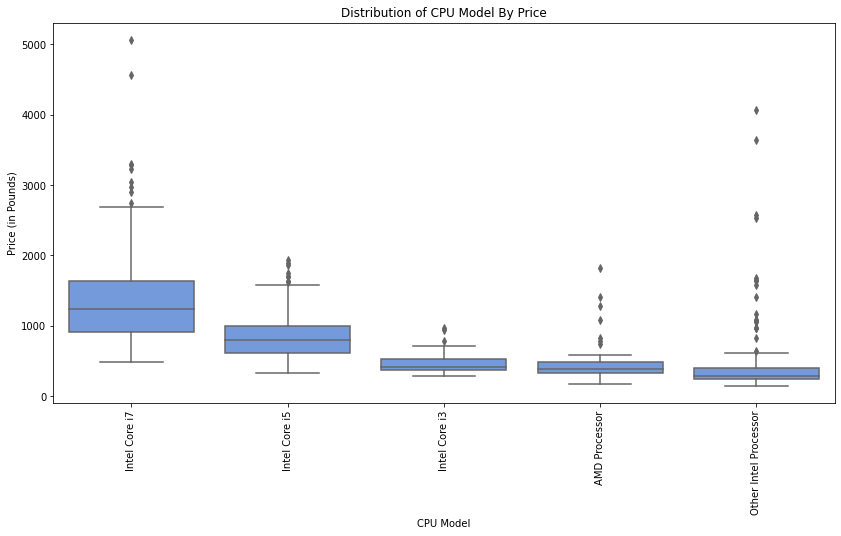

In [36]:
# Box chart to identify the most expensive CPU model
graph = df.groupby(['CPU_Model'])['Price_pounds'].median().reset_index().sort_values('Price_pounds', ascending = False)

plt.figure(figsize = (14, 7))
plt.title('Distribution of CPU Model By Price')
sns.boxplot(x = 'CPU_Model',
            y = 'Price_pounds',
            color = 'cornflowerblue',
            data = df,
            order = graph['CPU_Model']
           )
plt.xticks(rotation = 'vertical')
plt.ylabel('Price (in Pounds)')
plt.xlabel('CPU Model')
plt.show()

The box plot suggests that laptops with 7th generation Intel Core CPU have the highest median price, as well as the highest price. Also, it can be concluded that gaming laptops in the dataset have either Intel Core i7 or other Intel processors.

#### GPU Brand 

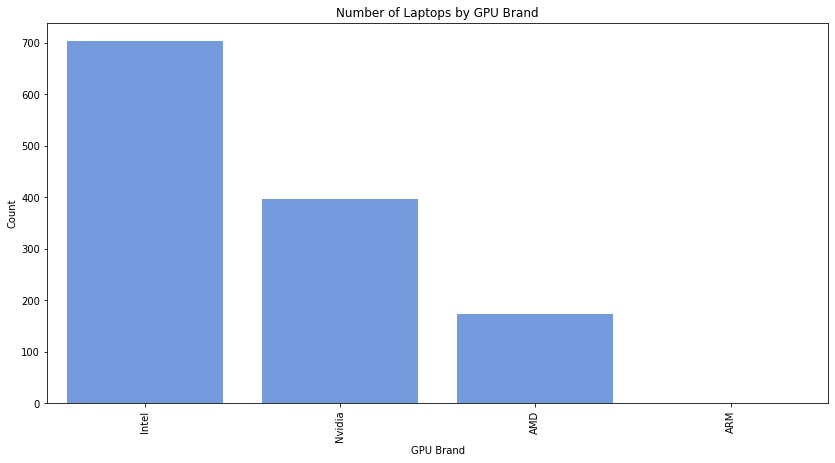

In [38]:
# Number of laptops by GPU brand
plt.subplots(figsize=(14,7))
plt.title('Number of Laptops by GPU Brand')
sns.countplot(x = 'GPU_Brand', 
              data = df, 
              color = 'cornflowerblue',
              order = df['GPU_Brand'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Count')
plt.xlabel('GPU Brand')
plt.show()

The bar chart displays the most used GPU brand while manufacturing the laptops. According to the dataset around 700 laptops have Intel GPU, while this figure is about 400 and below 200 for Nvidia and AMD respectively. There is only 1 laptop using ARM GPU.

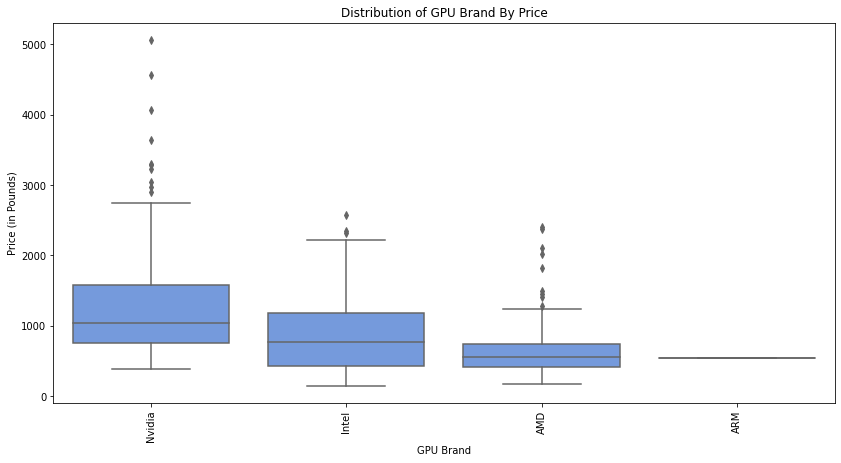

In [39]:
# Box chart to identify the most expensive GPU brand
graph = df.groupby(['GPU_Brand'])['Price_pounds'].median().reset_index().sort_values('Price_pounds', ascending = False)

plt.figure(figsize = (14, 7))
plt.title('Distribution of GPU Brand By Price')
sns.boxplot(x = 'GPU_Brand',
            y = 'Price_pounds',
            data = df,
            color = 'cornflowerblue',
            order = graph['GPU_Brand']
           )
plt.xticks(rotation = 'vertical')
plt.ylabel('Price (in Pounds)')
plt.xlabel('GPU Brand')
plt.show()

From the graph above, it is clear that Nvidia has the highest median price and the highest price as most gaming laptops in general use Nvidia graphic cards, and they are considered the best in the market along with AMD GPUs (Andrea, 2021). The fact that AMD is third in the pricing list can be explained by the dataset being more focused on the laptops with Nvidia and Intel GPUs.

#### Resolution

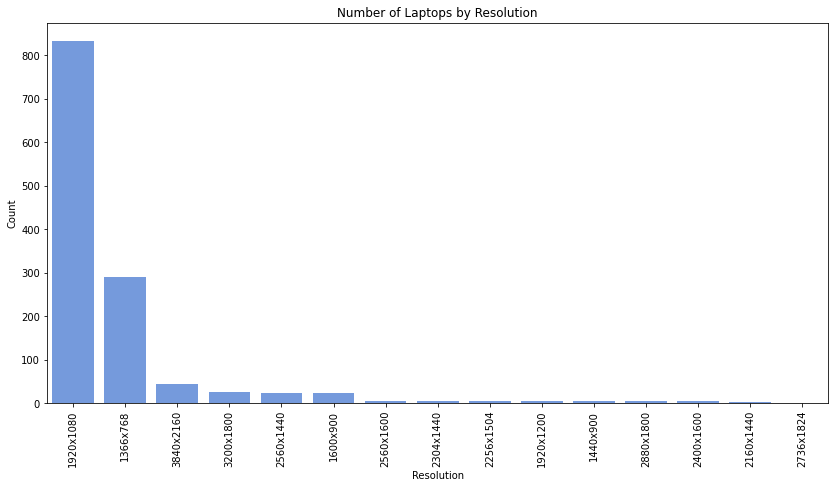

In [40]:
# Number of laptops by Resolution
plt.subplots(figsize = (14,7))
plt.title('Number of Laptops by Resolution')
sns.countplot(x = 'Resolution', 
              data = df, 
              color = 'cornflowerblue',
              order = df['Resolution'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Count')
plt.xlabel('Resolution')
plt.show()

The bar chart above indicates that laptops with the most frequent resolution in the dataset are laptops with HD resolution (1920x1080).

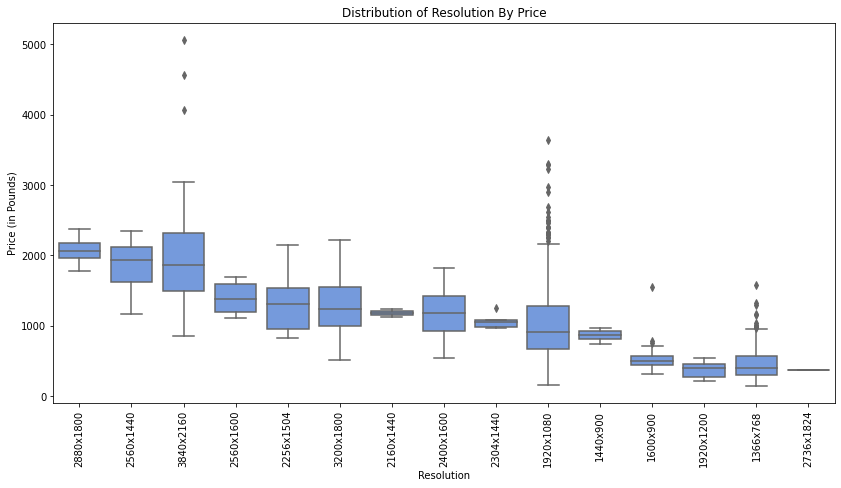

In [41]:
# Bar chart to identify laptops with which resolution are the most expensive
graph = df.groupby(['Resolution'])['Price_pounds'].median().reset_index().sort_values('Price_pounds', ascending = False)

plt.figure(figsize = (14, 7))
plt.title('Distribution of Resolution By Price')
sns.boxplot(
    x = 'Resolution',
    y = 'Price_pounds',
    data = df,
    color = 'cornflowerblue',
    order = graph['Resolution']
)
plt.xticks(rotation = 'vertical')
plt.ylabel('Price (in Pounds)')
plt.xlabel('Resolution')
plt.show()

The graph above suggests that 2880x1800 resolution laptops have the highest median, while the highest price is in the 4K category (3840x2160) which is intuitively correct as the latest resolution technology used in laptops is 4k resolution. Also, as there are many observations in the HD category, it is normal to have a few outliers as can be seen from the graph.

## Analysis of Numerical Features <a class="anchor" id="AnalysisofNumericalFeatures"></a>

#### Correlation Matrix

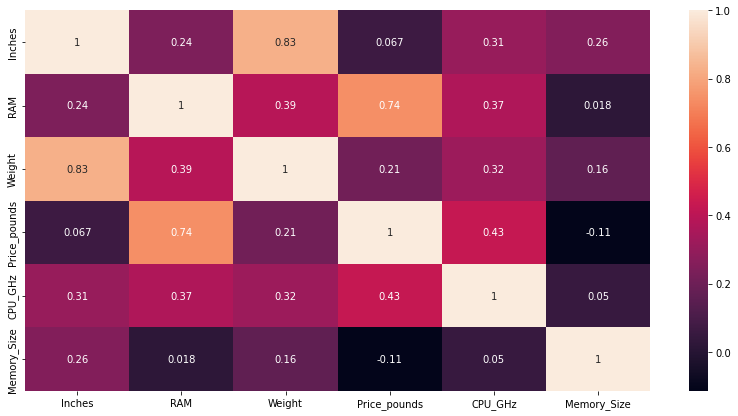

In [42]:
# Plot a heatmap of the correlation matrix (of each numerical feature)
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

The matrix above shows that there is a strong correlation between "Inches" and "Weight" variables. The same conclusion can be made for the "RAM" and "Price_pounds" variables.

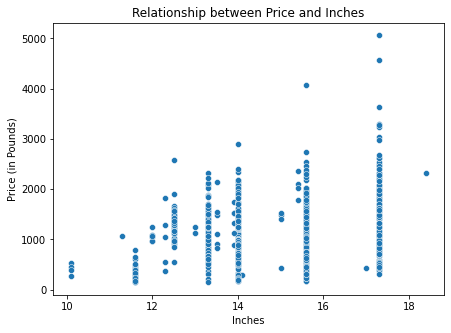

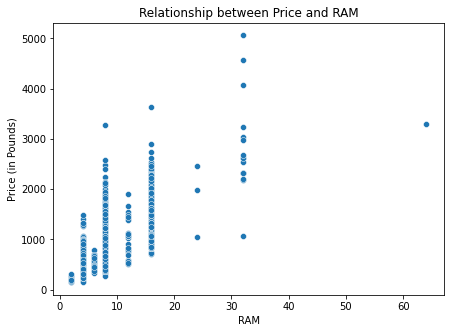

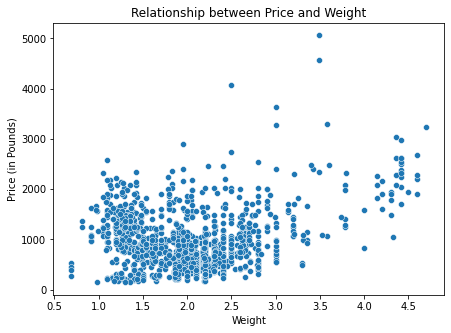

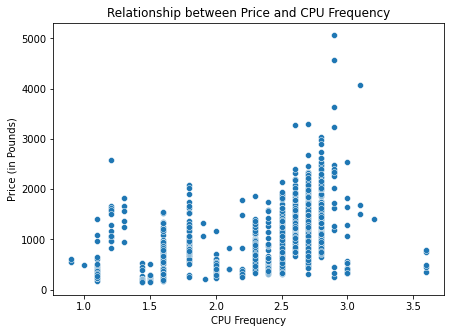

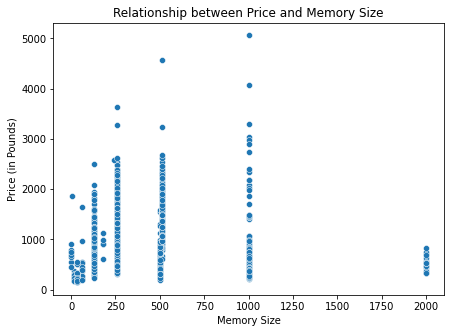

In [43]:
# Scatter plots for each numerical feature and price
plt.figure(figsize = (7,5))
sns.scatterplot(x = df['Inches'],y = df['Price_pounds'])
plt.ylabel('Price (in Pounds)')
plt.title('Relationship between Price and Inches')
plt.show()

plt.figure(figsize = (7,5))
sns.scatterplot(x = df['RAM'],y = df['Price_pounds'])
plt.ylabel('Price (in Pounds)')
plt.title('Relationship between Price and RAM')
plt.show()

plt.figure(figsize = (7,5))
sns.scatterplot(x = df['Weight'],y = df['Price_pounds'])
plt.ylabel('Price (in Pounds)')
plt.title('Relationship between Price and Weight')
plt.show()

plt.figure(figsize = (7,5))
sns.scatterplot(x = df['CPU_GHz'],y = df['Price_pounds'])
plt.ylabel('Price (in Pounds)')
plt.xlabel('CPU Frequency')
plt.title('Relationship between Price and CPU Frequency')
plt.show()

plt.figure(figsize = (7,5))
sns.scatterplot(x = df['Memory_Size'],y = df['Price_pounds'])
plt.ylabel('Price (in Pounds)')
plt.xlabel('Memory Size')
plt.title('Relationship between Price and Memory Size')
plt.show()

From the scatter plots above, it is clear that the trend between prices and numerical features is positive. 

In [44]:
# Summary table for the price variable
df['Price_pounds'].describe()

count    1275.000000
mean      942.024322
std       581.624572
min       144.420000
25%       505.470000
50%       820.870000
75%      1242.095000
max      5062.170000
Name: Price_pounds, dtype: float64

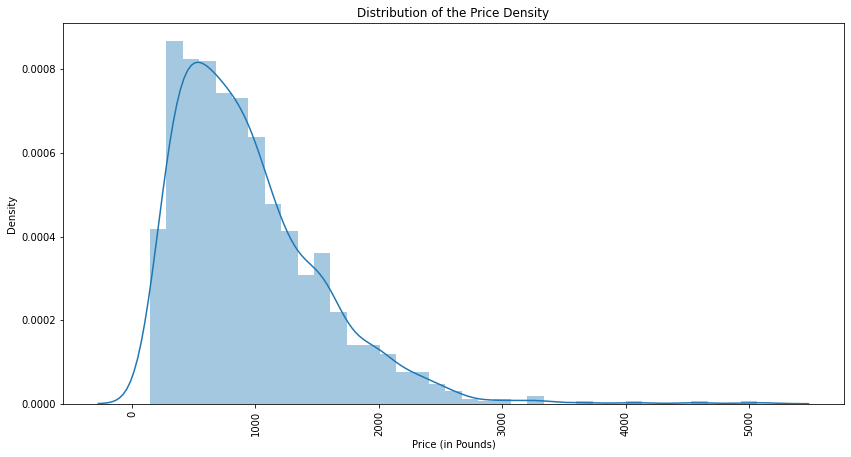

In [45]:
# Distribution of the price density
plt.subplots(figsize=(14,7))
plt.title('Distribution of the Price Density')
sns.distplot(df['Price_pounds'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Price (in Pounds)')
plt.ylabel('Density')
plt.show()

The density plot above indicates that the price variable has a right-skewed distribution.

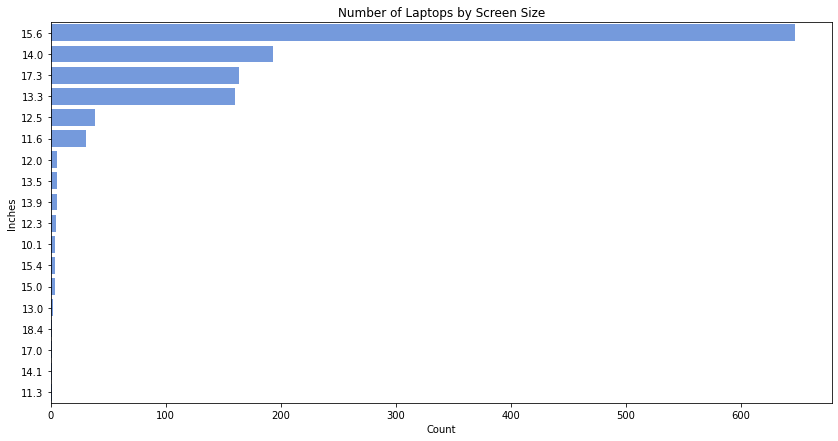

In [46]:
# Number of laptops by Screen Size
plt.subplots(figsize = (14,7))
plt.title('Number of Laptops by Screen Size')
sns.countplot(y = 'Inches', 
              data = df, 
              color = 'cornflowerblue',
              order = df['Inches'].value_counts().index)
plt.xticks(rotation = 'horizontal')
plt.ylabel('Inches')
plt.xlabel('Count')
plt.show()

The graph above shows that there are above 600 laptops with a screen size of 15.6 inches, which is followed by laptops with a screen size of 14.0 inches. There are less than 200 observations for the rest screen size categories.

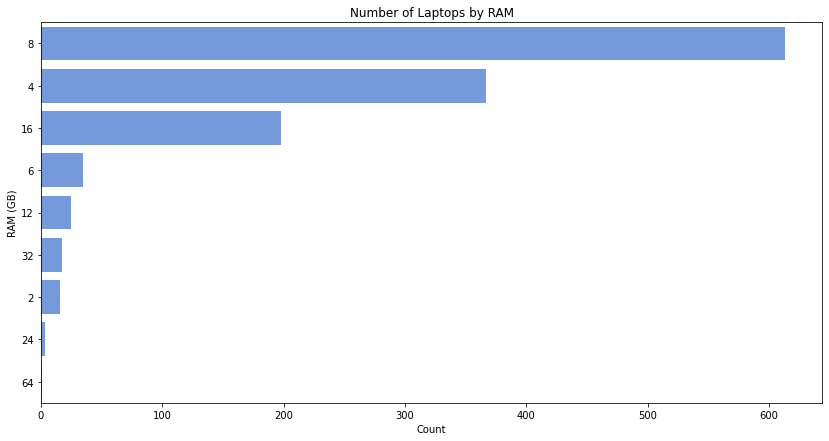

In [47]:
# Number of laptops by RAM
plt.subplots(figsize = (14,7))
plt.title('Number of Laptops by RAM')
sns.countplot(y = 'RAM', 
              data = df, 
              color = 'cornflowerblue',
              order = df['RAM'].value_counts().index)
plt.xticks(rotation = 'horizontal')
plt.ylabel('RAM (GB)')
plt.xlabel('Count')
plt.show()

As shown in the bar chart, there are about 600 laptops with 8GB of RAM, while this figure is around 380 and 200 for the laptops with 4GB and 16GB of RAM accordingly. The rest have less than 50 observations.

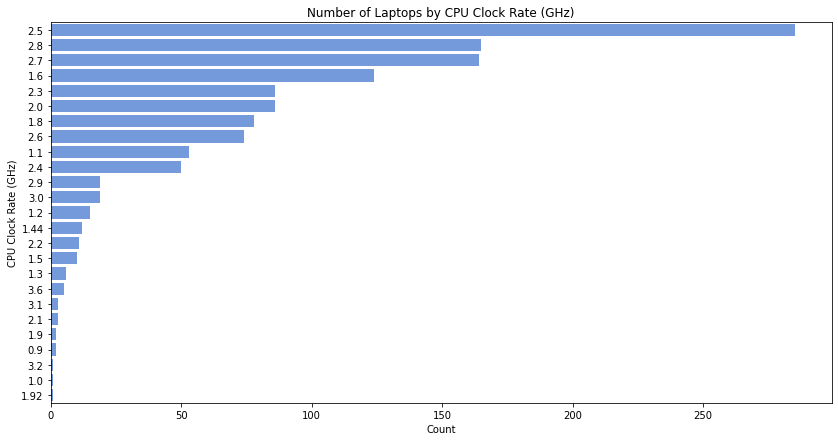

In [48]:
# Number of laptops by CPU frequency
plt.subplots(figsize = (14,7))
plt.title('Number of Laptops by CPU Clock Rate (GHz)')
sns.countplot(y = 'CPU_GHz', 
              data = df, 
              color = 'cornflowerblue',
              order = df['CPU_GHz'].value_counts().index)
plt.xticks(rotation = 'horizontal')
plt.ylabel('CPU Clock Rate (GHz)')
plt.xlabel('Count')
plt.show()

The graph above suggests that laptops with the most frequent CPU clock rate are the ones with 2.5GHz. Moreover, the number of laptops with a CPU frequency of 2.8GHz, 2.7GHz, and 1.6GHz is more than 100.

# Prediction Models <a class="anchor" id="PredictionModels"></a>

## Label Encoding and Standardization <a class="anchor" id="LabelEncodingandStandardization"></a>

In the preprocessing stage, categorical features are changed into the numeric format by using Label Encoding so that these variables can be used in the machine learning models.

In [50]:
# Choose price as dependent variable
X = df.drop('Price_pounds',axis = 1)
Y = pd.DataFrame(df['Price_pounds'],columns = ['Price_pounds'])

In [51]:
# Encoding
enc = {}
for cols in X.drop(['Inches','RAM','Weight','Memory_Size'], axis = 1).columns:
    enc[cols] = LabelEncoder()
    X[cols] = enc[cols].fit_transform(X[cols])

In the next step, all the features are scaled using the Standardization method.

In [52]:
# Standardization
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

df_prep = pd.concat([X,Y], axis = 1)
df_prep.head(5)

,Company,Product,TypeName,Inches,CPU,RAM,Memory,OpSys,Weight,Resolution,CPU_GHz,CPU_Model,Memory_Size,GPU_Brand,Price_pounds
0,-1.333546,-0.042870,1.136135,-1.205746,-0.495277,-0.086499,-1.549159,3.081382,-1.002380,2.241164,0.009565,-0.433648,-0.860760,-0.039845,NaN
1,-1.333546,-0.037025,1.136135,-1.205746,-0.575388,-0.086499,-1.801288,3.081382,-1.047227,-0.678609,-1.170573,-0.433648,-0.860760,-0.039845,1111.94
2,0.131784,-1.504040,0.334490,0.403873,-0.134776,-0.086499,-0.036386,-0.787414,-0.269871,-0.029770,0.402944,-0.433648,-0.499669,-0.039845,746.12
3,-1.333546,-0.042870,1.136135,0.263906,0.305837,1.483418,1.602452,3.081382,-0.314718,2.890003,0.796323,0.584586,0.222514,-2.201665,477.25
4,-1.333546,-0.042870,1.136135,-1.205746,-0.415165,-0.086499,-0.036386,3.081382,-1.002380,2.241164,1.583081,-0.433648,-0.499669,-0.039845,2106.08


The new data drame is checked for the null values

In [53]:
# Checking if there is any null values
df_prep.isnull().any()

Company         True
Product         True
TypeName        True
Inches          True
CPU             True
RAM             True
Memory          True
OpSys           True
Weight          True
Resolution      True
CPU_GHz         True
CPU_Model       True
Memory_Size     True
GPU_Brand       True
Price_pounds    True
dtype: bool

In [54]:
# Number of rows having null values in the dataset
missing_info = (len(df_prep[df_prep.isnull().any(axis=1)]) / len(df_prep) ) * 100
print(len(df_prep[df_prep.isnull().any(axis=1)]),' representing ' ,round(missing_info,2) , '% of the total dataset.')

36  representing  2.78 % of the total dataset.


In [55]:
# Number of columns having null values in the dataset
cols = df_prep.columns[df_prep.isnull().any()].to_list()

for c in cols:
    print(c,type(c),": ",df_prep[c].isnull().sum())

Company <class 'str'> :  18
Product <class 'str'> :  18
TypeName <class 'str'> :  18
Inches <class 'str'> :  18
CPU <class 'str'> :  18
RAM <class 'str'> :  18
Memory <class 'str'> :  18
OpSys <class 'str'> :  18
Weight <class 'str'> :  18
Resolution <class 'str'> :  18
CPU_GHz <class 'str'> :  18
CPU_Model <class 'str'> :  18
Memory_Size <class 'str'> :  18
GPU_Brand <class 'str'> :  18
Price_pounds <class 'str'> :  18


As there were only 2.78% null values, all of them are dropped

In [56]:
# Removing rows with null values 
df_prep = df_prep.dropna()
df_prep.isnull().any()

Company         False
Product         False
TypeName        False
Inches          False
CPU             False
RAM             False
Memory          False
OpSys           False
Weight          False
Resolution      False
CPU_GHz         False
CPU_Model       False
Memory_Size     False
GPU_Brand       False
Price_pounds    False
dtype: bool

<AxesSubplot:>

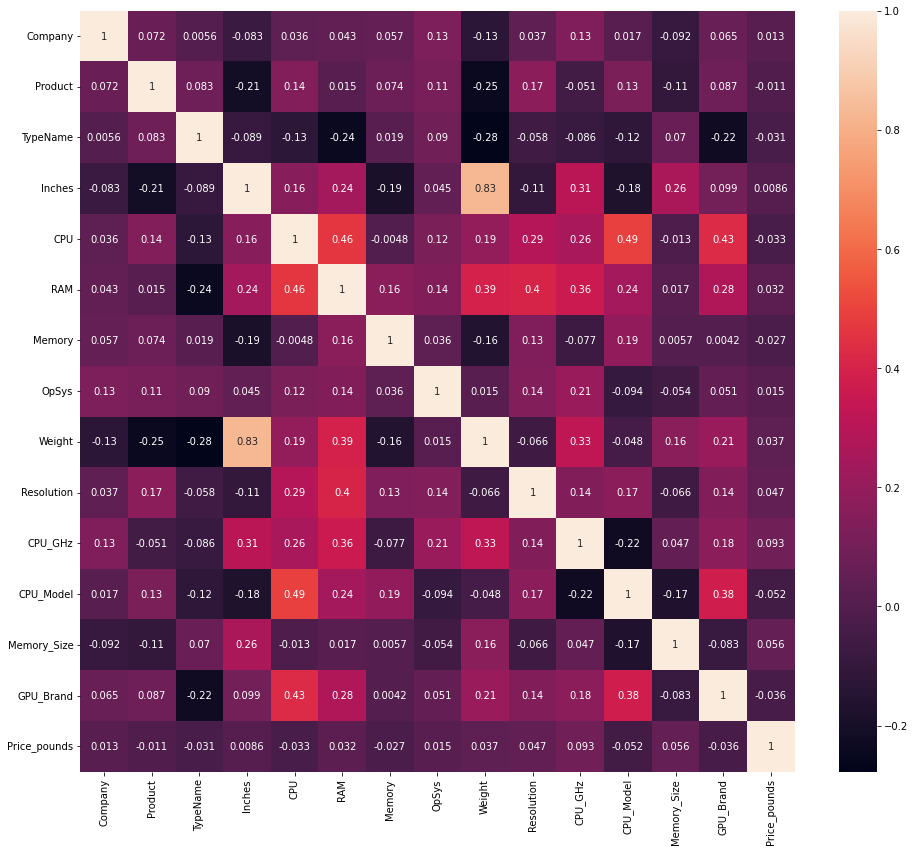

In [57]:
# Correlation Matrix for all the variables after label encoding and standardization
plt.figure(figsize = (16,14))
sns.heatmap(df_prep.corr(),annot = True)

In the correlation matrix, there is a strong correlation between "Inches" and "Weight" variables. This conclusion was also the case for the previous correlation matrix before scaling.

## Machine Learning Models <a class="anchor" id="MachineLearningModels"></a>

In this section, the data set is split into train and test sets, and then several ML models are used. The accuracy score of the train and test predictions is compared to each other.

#### Splitting Dataset into Train and Test

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Splitting the data set into train and test
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

#### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

# Using Linear Regression ML model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
# Predicting price using Linear Regression model on train data set
y_pred_train_lr = lr.predict(x_train)

lr_mse_train = mean_squared_error(y_train, y_pred_train_lr)
lr_rmse_train = np.sqrt(lr_mse_train)
lr_r2_train = metrics.r2_score(y_train, y_pred_train_lr)
print("Linear Regression MSE: ", lr_mse_train)
print("Linear Regression RMSE: ", lr_rmse_train)
print("Linear Regression R2: ", lr_r2_train)

Linear Regression MSE:  92019.90840924859
Linear Regression RMSE:  303.34783402762014
Linear Regression R2:  0.7343787424820251


In [61]:
# Predicting price using Linear Regression model on test data set
y_pred_test_lr = lr.predict(x_test)

lr_mse_test = mean_squared_error(y_test, y_pred_test_lr)
lr_rmse_test = np.sqrt(lr_mse_test)
lr_r2_test = metrics.r2_score(y_test, y_pred_test_lr)
print("Linear Regression MSE: ", lr_mse_test)
print("Linear Regression RMSE: ", lr_rmse_test)
print("Linear Regression R2: ", lr_r2_test)

Linear Regression MSE:  99524.03509387962
Linear Regression RMSE:  315.47430179632636
Linear Regression R2:  0.6726404496781593


The Linear Regression model fitted the test data less than the train data by approximately 6%.

#### Lasso Regression 

In [62]:
from sklearn.linear_model import Lasso

# Using Lasso ML model
lasso = Lasso(random_state = 10)
lasso.fit(x_train,y_train)

Lasso(random_state=10)

In [63]:
# Predicting price using Lasso model on train data set
y_pred_train_lasso = lasso.predict(x_train)

lasso_mse_train = mean_squared_error(y_train, y_pred_train_lasso)
lasso_rmse_train = np.sqrt(lasso_mse_train)
lasso_R2_train = metrics.r2_score(y_train, y_pred_train_lasso)
print("Lasso Regression MSE: ",lasso_mse_train)
print("Lasso Regression RMSE: ",lasso_rmse_train)
print("Lasso Regression R2: ",lasso_R2_train)

Lasso Regression MSE:  92041.85684935894
Lasso Regression RMSE:  303.38400888866727
Lasso Regression R2:  0.7343153869281731


In [64]:
# Predicting price using Lasso model on test data set
y_pred_test_lasso = lasso.predict(x_test)

lasso_mse_test = mean_squared_error(y_test, y_pred_test_lasso)
lasso_rmse_test = np.sqrt(lasso_mse_test)
lasso_R2_test = metrics.r2_score(y_test, y_pred_test_lasso)
print("Lasso Regression MSE: ",lasso_mse_test)
print("Lasso Regression RMSE: ",lasso_rmse_test)
print("Lasso Regression R2: ",lasso_R2_test)

Lasso Regression MSE:  99623.11473501708
Lasso Regression RMSE:  315.63129555704245
Lasso Regression R2:  0.672314551851185


The Lasso Regression performed almost the same as The Linear Regression model and the difference between the R2 is again about 6%.

#### Support Vector Machine

In [65]:
from sklearn.svm import SVR

# Using Support Vector Regression ML model
svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [66]:
# Predicting price using SVR model on train data set
y_pred_train_svr = svr.predict(x_train)

svr_mse_train = mean_squared_error(y_train, y_pred_train_svr)
svr_rmse_train = np.sqrt(svr_mse_train)
svr_R2_train = metrics.r2_score(y_train, y_pred_train_svr)
print("SVR MSE: ",svr_mse_train)
print("SVR RMSE: ",svr_rmse_train)
print("SVR R2: ",svr_R2_train)

SVR MSE:  111521.90050283211
SVR RMSE:  333.94894894703907
SVR R2:  0.6780850148142563


In [67]:
# Predicting price using SVR model on test data set
y_pred_test_svr = svr.predict(x_test)

svr_mse_test = mean_squared_error(y_test, y_pred_test_svr)
svr_rmse_test = np.sqrt(svr_mse_test)
svr_R2_test = metrics.r2_score(y_test, y_pred_test_svr)
print("SVR MSE: ",svr_mse_test)
print("SVR RMSE: ",svr_rmse_test)
print("SVR R2: ",svr_R2_test)

SVR MSE:  108334.82760493182
SVR RMSE:  329.14256425587354
SVR R2:  0.6436595399745246


Support Vector Machine performed worse than the two previous models. The difference between train and test accuracy scores is around 3%.

#### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

# Using Decision Tree ML model
dt = DecisionTreeRegressor(random_state = 10)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=10)

In [69]:
# Predicting price using Decision Tree model on train data set
y_pred_train_dt = dt.predict(x_train)

dt_mse_train = mean_squared_error(y_train, y_pred_train_dt)
dt_rmse_train = np.sqrt(dt_mse_train)
dt_r2_train = metrics.r2_score(y_train, y_pred_train_dt)
print("Decision Tree MSE: ", dt_mse_train)
print("Decision Tree RMSE: ", dt_rmse_train)
print("Decision Tree R2: ", dt_r2_train)

Decision Tree MSE:  312.4908449264705
Decision Tree RMSE:  17.677410583184137
Decision Tree R2:  0.999097975507397


In [70]:
# Predicting price using Decision Tree model on test data set
y_pred_test_dt = dt.predict(x_test)

dt_mse_test = mean_squared_error(y_test, y_pred_test_dt)
dt_rmse_test = np.sqrt(dt_mse_test)
dt_r2_test = metrics.r2_score(y_test, y_pred_test_dt)
print("Decision Tree MSE: ", dt_mse_test)
print("Decision Tree RMSE: ", dt_rmse_test)
print("Decision Tree R2: ", dt_r2_test)

Decision Tree MSE:  90693.8309064951
Decision Tree RMSE:  301.15416468396234
Decision Tree R2:  0.7016852092611637


Decision Tree performed better than the previous models, however, the difference between the accuracy scores of train and test sets is about 20%. 

#### Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Using Random Forest ML model
rf = RandomForestRegressor(random_state = 10)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [73]:
# Predicting price using Random Forest model on train data set
y_pred_train_rf = rf.predict(x_train)

rf_mse_train = mean_squared_error(y_train, y_pred_train_rf)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_R2_train = metrics.r2_score(y_train, y_pred_train_rf)
print("Random Forest MSE: ",rf_mse_train)
print("Random Forest RMSE: ",rf_rmse_train)
print("Random Forest R2: ",rf_R2_train)

Random Forest MSE:  7514.231400273207
Random Forest RMSE:  86.6846664657205
Random Forest R2:  0.9783096981041874


In [74]:
# Predicting price using Random Forest model on test data set
y_pred_test_rf = rf.predict(x_test)

rf_mse_test = mean_squared_error(y_test, y_pred_test_rf)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_R2_test = metrics.r2_score(y_test,y_pred_test_rf)
print("Random Forest MSE: ",rf_mse_test)
print("Random Forest RMSE: ",rf_rmse_test)
print("Random Forest R2: ",rf_R2_test)

Random Forest MSE:  56264.73083867257
Random Forest RMSE:  237.20187781438952
Random Forest R2:  0.8149311674415827


Random Forest performed better than the earlier models and the difference between the accuracy scores is approximately 16%.

#### XGBoost 

In [76]:
from xgboost import XGBRegressor

# Using XGBoost ML model
xgb = XGBRegressor(random_state = 10)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
# Predicting price using XGBoost model on train data set
y_pred_train_xgb = xgb.predict(x_train)

xgb_mse_train = mean_squared_error(y_train, y_pred_train_xgb)
xgb_rmse_train = np.sqrt(xgb_mse_train)
xgb_R2_train = metrics.r2_score(y_train, y_pred_train_xgb)
print("XGBoost MSE: ",xgb_mse_train)
print("XGBoost RMSE: ",xgb_rmse_train)
print("XGBoost R2: ",xgb_R2_train)

XGBoost MSE:  1022.5103987194607
XGBoost RMSE:  31.976716509351935
XGBoost R2:  0.9970484593754956


In [78]:
# Predicting price using XGBoost model on test data set

y_pred_test_xgb = xgb.predict(x_test)

xgb_mse_test = mean_squared_error(y_test, y_pred_test_xgb)
xgb_rmse_test = np.sqrt(xgb_mse_test)
xgb_R2_test = metrics.r2_score(y_test, y_pred_test_xgb)
print("XGBoost MSE: ",xgb_mse_test)
print("XGBoost RMSE: ",xgb_rmse_test)
print("XGBoost R2: ",xgb_R2_test)

XGBoost MSE:  46140.98480832987
XGBoost RMSE:  214.80452697354838
XGBoost R2:  0.8482307110637777


As expected, XGBoost is by far the best performing model and it fitted 85% of the test data. The accuracy score difference between train and test sets is around 14%.

# Fine-Tuning <a class="anchor" id="FineTuning"></a>

## Best Performing Models <a class="anchor" id="BestPerformingModels"></a>

After analysis of different models, two best performing models are chosen based on the RMSE and R squared of the test set. In this section of the report, hyperparameter tuning is performed on Random Forest and XGBoost. Also, feature importance graphs are plotted for these models.

## Random Forest Regressor  <a class="anchor" id="RandomForestRegressor"></a>

First, several Random Grid Search iterations were done to narrow down the hyperparameters range.

In [80]:
# Code Retrieved from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 5000, num = 10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 15, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1000, 1444, 1888, 2333, 2777, 3222, 3666, 4111, 4555, 5000]}


In [81]:
# Using random grid search to find the best hyperparameters
# Random search of parameters, using 10 fold cross validation 
# Searching across 100 different combinations, and using all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               n_iter = 100, 
                               cv = 10, 
                               verbose = 2, 
                               random_state = 10, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 15, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1000, 1444, 1888, 2333,
                                                         2777, 3222, 3666, 4111,
                                                         4555, 5000]},
                   random_state=10, verbose=2)

In [82]:
# Showing the best parameteres after randomized grid search
rf_random.best_params_

{'n_estimators': 3666,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [83]:
# Initial model results
rf = RandomForestRegressor(random_state = 10)
rf.fit(x_train, y_train)
y_pred_test_rf = rf.predict(x_test)

rf_mse_test = mean_squared_error(y_test, y_pred_test_rf)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_R2_test = metrics.r2_score(y_test,y_pred_test_rf)
print("Random Forest MSE: ",rf_mse_test)
print("Random Forest RMSE: ",rf_rmse_test)
print("Random Forest R2: ",rf_R2_test)

Random Forest MSE:  56264.73083867257
Random Forest RMSE:  237.20187781438952
Random Forest R2:  0.8149311674415827


In [84]:
# Results after best randomized grid search parameters
rf_new = rf_random.best_estimator_
rf_new.fit(x_train, y_train)
y_pred_test_rf_new = rf_new.predict(x_test)

rf_new_mse_test = mean_squared_error(y_test, y_pred_test_rf_new)
rf_new_rmse_test = np.sqrt(rf_new_mse_test)
rf_new_R2_test = metrics.r2_score(y_test,y_pred_test_rf_new)
print("Random Forest MSE: ",rf_new_mse_test)
print("Random Forest RMSE: ",rf_new_rmse_test)
print("Random Forest R2: ",rf_new_R2_test)

Random Forest MSE:  47600.173950190445
Random Forest RMSE:  218.17464094204541
Random Forest R2:  0.843431071450458


In [85]:
# Showing the accuracy improvement
print('Improvement of {:0.2f}%'.format( 100 * (rf_new_R2_test - rf_R2_test) / rf_R2_test))

Improvement of 3.50%


Although model performance improved by 3.50%, numerous Grid Search iterations are applied to check if the performance can be improved further.

In [124]:
# Using GridSearch to find the best parameters of the model
from sklearn.model_selection import GridSearchCV

# Creating the parameter grid
param_grid = {
    'bootstrap': [False],
    'max_depth': [14, 15, 16],
    'max_features': [1, 3, 6],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [1000, 1500, 2000]}

# The grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

# Fitting the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [14, 15, 16],
                         'max_features': [1, 3, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1000, 1500, 2000]},
             verbose=2)

In [125]:
# Showing the best parameteres after grid search
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 16,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [126]:
# Results after best grid search parameters
rf_best = grid_search.best_estimator_
rf_best.fit(x_train, y_train)
y_pred_test_rf_best = rf_best.predict(x_test)

rf_best_mse_test = mean_squared_error(y_test, y_pred_test_rf_best)
rf_best_rmse_test = np.sqrt(rf_best_mse_test)
rf_best_R2_test = metrics.r2_score(y_test,y_pred_test_rf_best)
print("Random Forest MSE: ",rf_best_mse_test)
print("Random Forest RMSE: ",rf_best_rmse_test)
print("Random Forest R2: ",rf_best_R2_test)

Random Forest MSE:  47571.959967863484
Random Forest RMSE:  218.1099721880306
Random Forest R2:  0.8435238743252473


In [127]:
# Showing the accuracy improvement
print('Improvement of {:0.2f}%'.format( 100 * (rf_best_R2_test - rf_new_R2_test) / rf_new_R2_test))

Improvement of 0.01%


After implementation of the Grid Search, the performance of the model did not improve tremendously.

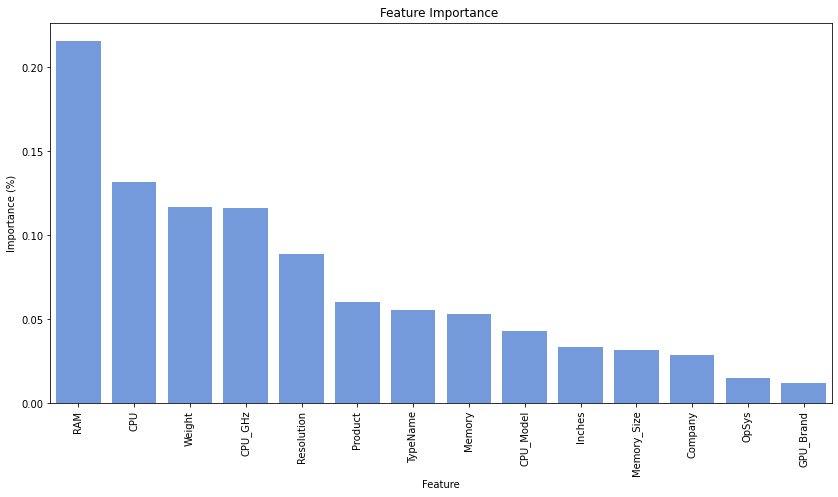

In [143]:
# Create a new DataFrame for feature importance
rf_best.feature_names = df_prep.drop('Price_pounds', axis = 1).columns
rf_best_feature_importance = pd.DataFrame({'Feature': rf_best.feature_names,'Importance':rf_best.feature_importances_})
rf_best_feature_importance = rf_best_feature_importance.sort_values(by = ["Importance"], ascending = False)

# Plotting the feature importance graph
plt.figure(figsize = (14,7))
sns.barplot(rf_best_feature_importance["Feature"], rf_best_feature_importance["Importance"], color = 'cornflowerblue')
plt.ylabel('Importance (%)')
plt.xticks(rotation = 'vertical')
plt.title('Feature Importance ')
plt.show()

The top 5 important variables for laptop price prediction are "RAM", "CPU", "Weight", "CPU_GHz", and "Resolution, while the importance of the rest features is around 5% or less.

## XGBoost Regressor  <a class="anchor" id="XGBoostRegressor"></a>

In [110]:
# Code Retrieved from https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663
from sklearn.model_selection import GridSearchCV

# Creating the parameter grid
params = {'max_depth': [5, 6, 7],
          'learning_rate': [0.01, 0.05, 0.1],
          'n_estimators': [1500, 2000, 5000],
          'colsample_bytree': [0.3, 0.7]}

# The grid search model
grid_search_xgb = GridSearchCV(estimator = xgb, 
                           param_grid = params,
                           scoring = 'neg_mean_squared_error', 
                           verbose = 1)

# Fit the grid search to the data
grid_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=10, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,

In [111]:
# Showing the best parameteres after grid search
grid_search_xgb.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 2000}

In [112]:
# Initial model results
y_pred_test_xgb = xgb.predict(x_test)

xgb_mse_test = mean_squared_error(y_test, y_pred_test_xgb)
xgb_rmse_test = np.sqrt(xgb_mse_test)
xgb_R2_test = metrics.r2_score(y_test, y_pred_test_xgb)
print("XGBoost MSE: ",xgb_mse_test)
print("XGBoost RMSE: ",xgb_rmse_test)
print("XGBoost R2: ",xgb_R2_test)

XGBoost MSE:  46140.98480832987
XGBoost RMSE:  214.80452697354838
XGBoost R2:  0.8482307110637777


In [113]:
# Results after best grid search parameters
xgb_best = grid_search_xgb.best_estimator_
xgb_best.fit(x_train, y_train)
y_pred_test_xgb_best = xgb_best.predict(x_test)

xgb_best_mse_test = mean_squared_error(y_test, y_pred_test_xgb_best)
xgb_best_rmse_test = np.sqrt(xgb_best_mse_test)
xgb_best_R2_test = metrics.r2_score(y_test,y_pred_test_xgb_best)
print("XGBoost MSE: ",xgb_best_mse_test)
print("XGBoost RMSE: ",xgb_best_rmse_test)
print("XGBoost R2: ",xgb_best_R2_test)

XGBoost MSE:  39608.12911396133
XGBoost RMSE:  199.01791154054786
XGBoost R2:  0.8697189143948489


In [114]:
# Showing the accuracy improvement
print('Improvement of {:0.2f}%'.format( 100 * (xgb_best_R2_test - xgb_R2_test) / xgb_R2_test))

Improvement of 2.53%


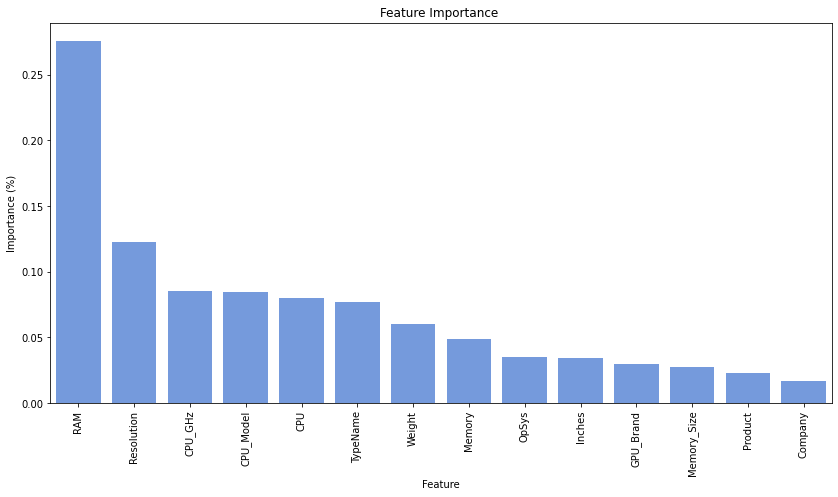

In [144]:
# Create a new DataFrame for feature importance
xgb_best.feature_names = df_prep.drop('Price_pounds', axis = 1).columns
xgb_best_feature_importance = pd.DataFrame({'Feature': xgb_best.feature_names,'Importance':xgb_best.feature_importances_})
xgb_best_feature_importance = xgb_best_feature_importance.sort_values(by = ["Importance"], ascending = False)

# Plotting the feature importance graph
plt.figure(figsize = (14,7))
sns.barplot(xgb_best_feature_importance["Feature"], xgb_best_feature_importance["Importance"], color = 'cornflowerblue')
plt.ylabel('Importance (%)')
plt.xticks(rotation = 'vertical')
plt.title('Feature Importance ')
plt.show()

The XGBoost feature importance graph is different from the Random Forest one in terms of the order of the important variables, however, the most important feature is still RAM (above 25%).

## Stacking Models  <a class="anchor" id="StackingModels"></a>

The Voting Regression model is used to check if the combination of the two best models can perform better than the individual models.

In [129]:
# Code Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html
# Stack the models using Voting Regressor
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('rf', rf_best), ('xgb', xgb_best)])
vr.fit(x_train, y_train)

# Predict the test data
y_pred_test_vr = vr.predict(x_test)

vr_mse_test = mean_squared_error(y_test, y_pred_test_vr)
vr_rmse_test = np.sqrt(vr_mse_test)
vr_R2_test = metrics.r2_score(y_test,y_pred_test_vr)
print("Voting Regression MSE: ",vr_mse_test)
print("Voting Regression RMSE: ",vr_rmse_test)
print("Voting Regression R2: ",vr_R2_test)

Voting Regression MSE:  41860.74479265364
Voting Regression RMSE:  204.59898531677433
Voting Regression R2:  0.8623094956054174


In [132]:
# Comparing the accuracy scores of the models
print("Voting Regression R2: ",vr_R2_test.round(decimals = 2))
print("XGBoost R2: ",xgb_best_R2_test.round(decimals = 2))
print("Random Forest R2: ",rf_best_R2_test.round(decimals = 2))

Voting Regression R2:  0.86
XGBoost R2:  0.87
Random Forest R2:  0.84


Although the Voting Regression model performed better than the Random Forest one, the accuracy score of the VR model is slightly lower than the XGBoost.

# Summary of the Results <a class="anchor" id="SummaryoftheResults"></a>

The chosen price-predicting model is XGBoost as it outperformed all of the models used in the analysis of the laptop prices. The XGBoost model provided useful insights into the independent variables and the R-squared of the XGBoost model indicated that it can explain 87% of the data when used for prediction.

In [138]:
# Table showing the feature importance
xgb_best_feature_importance["Importance"] = xgb_best_feature_importance["Importance"].round(decimals = 2)
print(xgb_best_feature_importance)

        Feature  Importance
5           RAM        0.28
9    Resolution        0.12
10      CPU_GHz        0.09
11    CPU_Model        0.08
4           CPU        0.08
2      TypeName        0.08
8        Weight        0.06
6        Memory        0.05
7         OpSys        0.04
3        Inches        0.03
13    GPU_Brand        0.03
12  Memory_Size        0.03
1       Product        0.02
0       Company        0.02


The above table shows the importance of the features used in the manufacturing of the laptops. This will make it easier for retail laptop stores in understanding the pricing of the laptops.

# Conclusion <a class="anchor" id="Conclusion"></a>

For this report, a secondary dataset is used to investigate the factors that influence the selling price of the laptops, as well as, provide useful insights about the features through data visualizations. Several machine learning models are tested and the best one (XGBoost) is chosen, after fine-tuning and ensemble process, as the price-predictive model that can be used by the retail laptop stores. Moreover, from the feature importance table, it is concluded that the "RAM" variable is the most important factor influencing the price of the laptops.

Regarding limitations, as there were not many explanatory variables, the model may have suffered from the reduced precision of the price predictions. Given more time and resources, the performance of the predictive model might have been improved further through the even more Grid Search iterations. Also, more comprehensive and accurate data is needed to obtain additional insights into the problem and improve the price-predictive model.

# Reference List <a class="anchor" id="ReferenceList"></a>

Varli M. (2021). _Laptop Price_ [online] Available at: \ 
<https://www.kaggle.com/muhammetvarl/laptop-price> [Accessed 10 February 2022].

Kinton R. (2022). _10 Best Razer Blade Laptops: Are They ACTUALLY Worth It?_ [online] Available at: \
<https://laptop251.com/razer-blade-laptops/> [Accessed 2 March 2022].

MedCPU (2021). _Workstation Vs Laptop – Which One Should You Get in 2021?_. [online] Available at: \
<https://medcpu.com/workstation-vs-laptop/> [Accessed 2 March 2022].

Andrea H. (2021). _Best Graphics Processing Unit (GPU) & Graphics Card Brands for Computers_. [online] Available at: \
<https://www.tech21century.com/best-gpu-graphics-card-brands/#Best_GPU_Brands> [Accessed 2 March 2022].